In [37]:
import torch 
import torchvision
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from PIL import Image
import os, time
import tqdm
import matplotlib.pyplot as plt

In [89]:
train_path = "/home/kotresh/transfer_learning/DiabeticRetinopathy/Train/"
label_csv = "/home/kotresh/transfer_learning/DiabeticRetinopathy/trainLabels.csv"
valid = "/home/kotresh/transfer_learning/DiabeticRetinopathy/Valid"

In [167]:
class Diabetic_retinopathy(Dataset):
    def __init__(self,root_dir,root_dir_csv,transform=None):
        self.root_dir = root_dir
        self.root_dir_label = root_dir_csv 
        self.df = pd.read_csv(self.root_dir_label)
        self.files = sorted(os.listdir(self.root_dir))
        self.img_label = []
        for f in self.files:
            label= f.split('.')[0]
            self.img_label.append(label)
        self.df = self.df.loc[self.df.image.isin(self.img_label),:]
        self.df.image = self.df['image'].astype(str)+'.jpeg'
        
        
        self.transform=transform
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        print(idx)
        img = self.df.loc[idx,["image"]].values[0]
        print(img)
        label = self.df.loc[idx,["level"]].values[0]
        print(label)
        image = Image.open(os.path.join(self.root_dir,img))
        
        if self.transform:
            image = self.transform(image)
        return image, label

In [168]:
train = Diabetic_retinopathy(train_path,label_csv,transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

In [154]:
#valid = Diabetic_retinopathy(valid, label_csv,transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

In [169]:
dataloader = DataLoader(train, batch_size=1, shuffle=True)

In [170]:
img, label=next(iter(dataloader))


2
13_left.jpeg
0


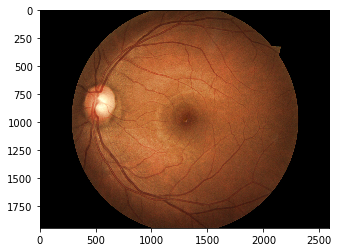

In [171]:
plt.imshow(img[0].permute((1,2,0)))

In [172]:
label

tensor([0])

In [34]:
data_loader_valid = DataLoader(valid, batch_size=1, shuffle=True)

In [35]:
img, label = next(iter(data_loader_valid))

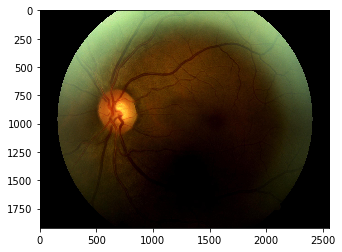

In [36]:
plt.imshow(img[0].permute((1,2,0)))